In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
dataset=pd.read_csv('data.csv')

In [118]:
dataset.head()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,100.132027,1,67,1,0,1
1,99.761447,1,10,0,0,0
2,98.020578,1,75,1,1,1
3,99.237362,0,71,1,-1,1
4,100.025546,1,11,1,0,1


In [119]:
dataset.dtypes

fever            float64
bodyPain           int64
age                int64
runnyNose          int64
diffBreath         int64
infectionProb      int64
dtype: object

In [120]:
dataset['infectionProb'].unique()# here we have seen this target column which to be predicted

array([1, 0], dtype=int64)

In [121]:
dataset_class_corr=dataset.corr()['infectionProb']

In [122]:
dataset_class_corr# then we have found out the corelation

fever           -0.007728
bodyPain         0.001291
age             -0.032950
runnyNose       -0.008725
diffBreath      -0.015840
infectionProb    1.000000
Name: infectionProb, dtype: float64

In [123]:
dataset_class_corr.sort_values(ascending=False)

infectionProb    1.000000
bodyPain         0.001291
fever           -0.007728
runnyNose       -0.008725
diffBreath      -0.015840
age             -0.032950
Name: infectionProb, dtype: float64

In [124]:
dataset.shape

(2517, 6)

In [125]:
x=dataset[['fever','bodyPain','age','runnyNose','diffBreath']]

In [126]:
#x=dataset[['bodyPain']]

In [127]:
x.shape

(2517, 5)

In [128]:
y=dataset['infectionProb']

In [129]:
y.shape

(2517,)

In [130]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [132]:
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)


In [133]:
# now we will check the accuarcy of each model and best one will be consider to predict

In [134]:
#from sklearn.naive_bayes import GaussianNB
#nb = GaussianNB()
#nb.fit(xtrain,ytrain)
#print("Test Accuracy: {}%".format(round(nb.score(xtest,ytest)*100,2)))

In [135]:
#from sklearn.tree import DecisionTreeClassifier
#dt = DecisionTreeClassifier()
#dt.fit(xtrain,ytrain)
#print("Test Accuracy: {}%".format(round(dt.score(xtest,ytest)*100,2)))

In [136]:
#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(n_estimators=100, random_state=42)
#rf.fit(xtrain,ytrain)
#print("Test Accuracy: {}%".format(round(rf.score(xtest,ytest)*100,2)))

In [137]:
#from sklearn.linear_model import LogisticRegression
#model=LogisticRegression(solver='lbfgs')

In [138]:
#model.fit(xtrain,ytrain)

In [139]:
#prediction=model.predict(xtest)

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

x, y = make_blobs(n_samples=10000, n_features=10, centers=100,random_state=0)

model = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores = cross_val_score(model, x, y, cv=5)
scores.mean()
#0.98...



0.9823000000000001

In [142]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [143]:
prediction=model.predict(xtest)

In [144]:
prediction

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [151]:
prob=model.predict_proba([[100,1,22,1,1]])

In [152]:
prob

array([[1., 0.]])

In [146]:
input_features = [100,1,22,1,1]
infectionProbability = model.predict_proba([input_features])[0][1]
infectionProbability

0.0

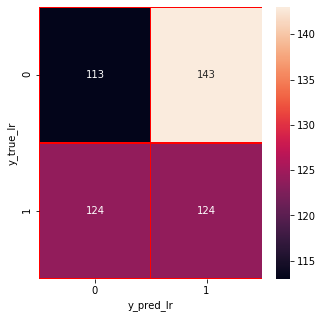

In [147]:
from sklearn.metrics import confusion_matrix
y_pred_lr = model.predict(xtest)
y_true_lr = ytest
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()

In [149]:
xtest.shape

(504, 5)

In [150]:
((113+124)/504)

0.47023809523809523

In [112]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, x, y, cv=5)
scores.mean()
#0.999...



0.9997

In [115]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean() > 0.999

True

In [ ]:
input_features = [100,1,22,1,1]
infectionProbability = model.predict_proba([input_features])[0][1]
infectionProbability

In [ ]:
model.predict_proba([[100,1,22,1,1]])

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [75]:
from sklearn.model_selection import cross_val_score


In [76]:
cv_scores=cross_val_score(knn,x,y,cv=5)

In [77]:
print(cv_scores)

[0.48910891 0.52683897 0.47514911 0.49502982 0.51093439]


In [78]:
print("cv_scores mean:{}".format(np.mean(cv_scores)))

cv_scores mean:0.49941223943467905


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_lr = model.predict(xtest)
y_true_lr = ytest
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()